In [ ]:
##Using APPLE stock price traded at NASDAQ to develop a time-series model

In [ ]:
#import libraries
import os
import pandas as pd
import numpy as np
import plotly.offline as py
import matplotlib.pyplot as plt
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pylab import rcParams
from pandas import Series
from numpy import log



In [ ]:
df = pd.read_csv("datasets_302666_618181_AAPL.csv")

Determine the Date range used in the dataset

In [ ]:
from pandas.tseries.offsets import BDay

In [ ]:
df.shape

(251, 7)

In [ ]:
df_date = df[['Date','Volume']]

In [ ]:
date1 = pd.date_range(start='8/15/2018',end='8/14/2019',freq=BDay())
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar = USFederalHolidayCalendar())

In [ ]:
date = pd.date_range(start = '8/15/2018', end ='8/14/2019', freq=us_bd)

In [ ]:
date

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [ ]:
df_date['Timestamp'] = pd.DataFrame(date, columns=['Date'])

In [ ]:
df_date.head()

Date    Volume  Timestamp
0  8/15/2018  28807600 2018-08-15
1  8/16/2018  28500400 2018-08-16
2  8/17/2018  35427000 2018-08-17
3  8/20/2018  30287700 2018-08-20
4  8/21/2018  26159800 2018-08-21

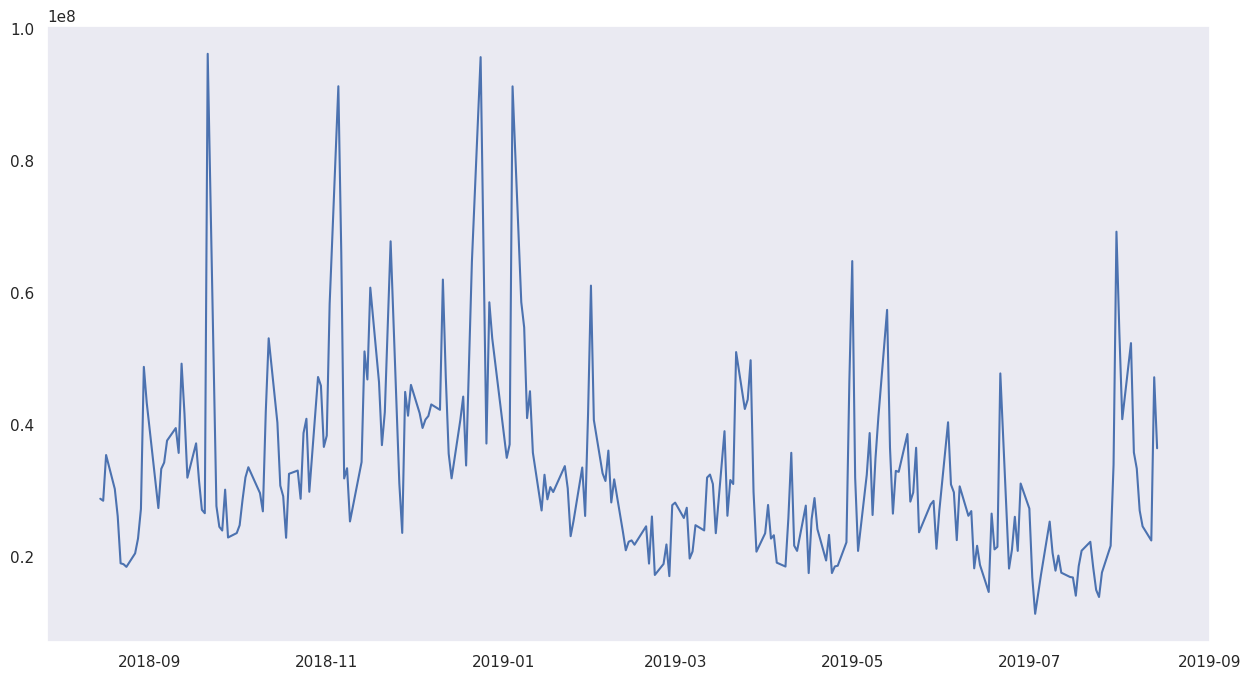

In [ ]:
rcParams['figure.figsize']= 15,8

plt.plot(df_date['Timestamp'], df_date['Volume']);
plt.grid()

In [ ]:
df_final = pd.read_csv("datasets_302666_618181_AAPL.csv", squeeze=True, index_col=0, parse_dates=True)

In [ ]:
df_final.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-15  209.220001  210.740005  208.330002  210.240005  207.027420   
2018-08-16  211.750000  213.809998  211.470001  213.320007  210.060333   
2018-08-17  213.440002  217.949997  213.160004  217.580002  214.255234   
2018-08-20  218.100006  219.179993  215.110001  215.460007  212.167633   
2018-08-21  216.800003  217.190002  214.029999  215.039993  211.754028   

              Volume  
Date                  
2018-08-15  28807600  
2018-08-16  28500400  
2018-08-17  35427000  
2018-08-20  30287700  
2018-08-21  26159800

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


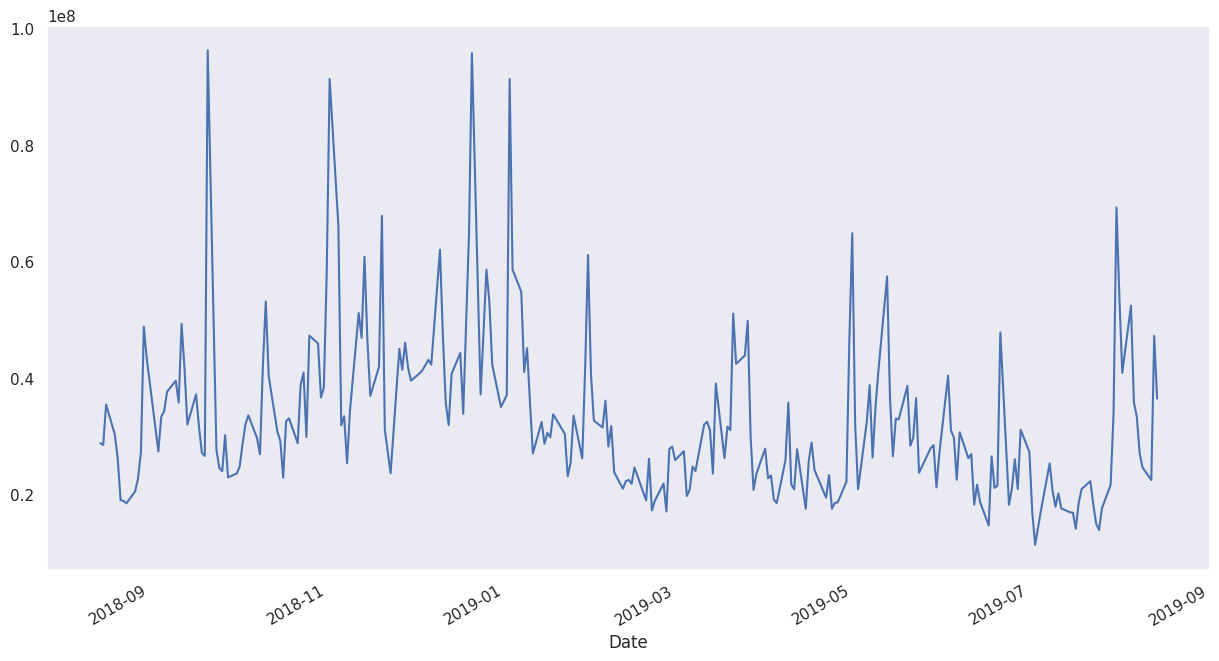

In [ ]:
rcParams['figure.figsize']= 15,8

df_final['Volume'].plot();
plt.grid()

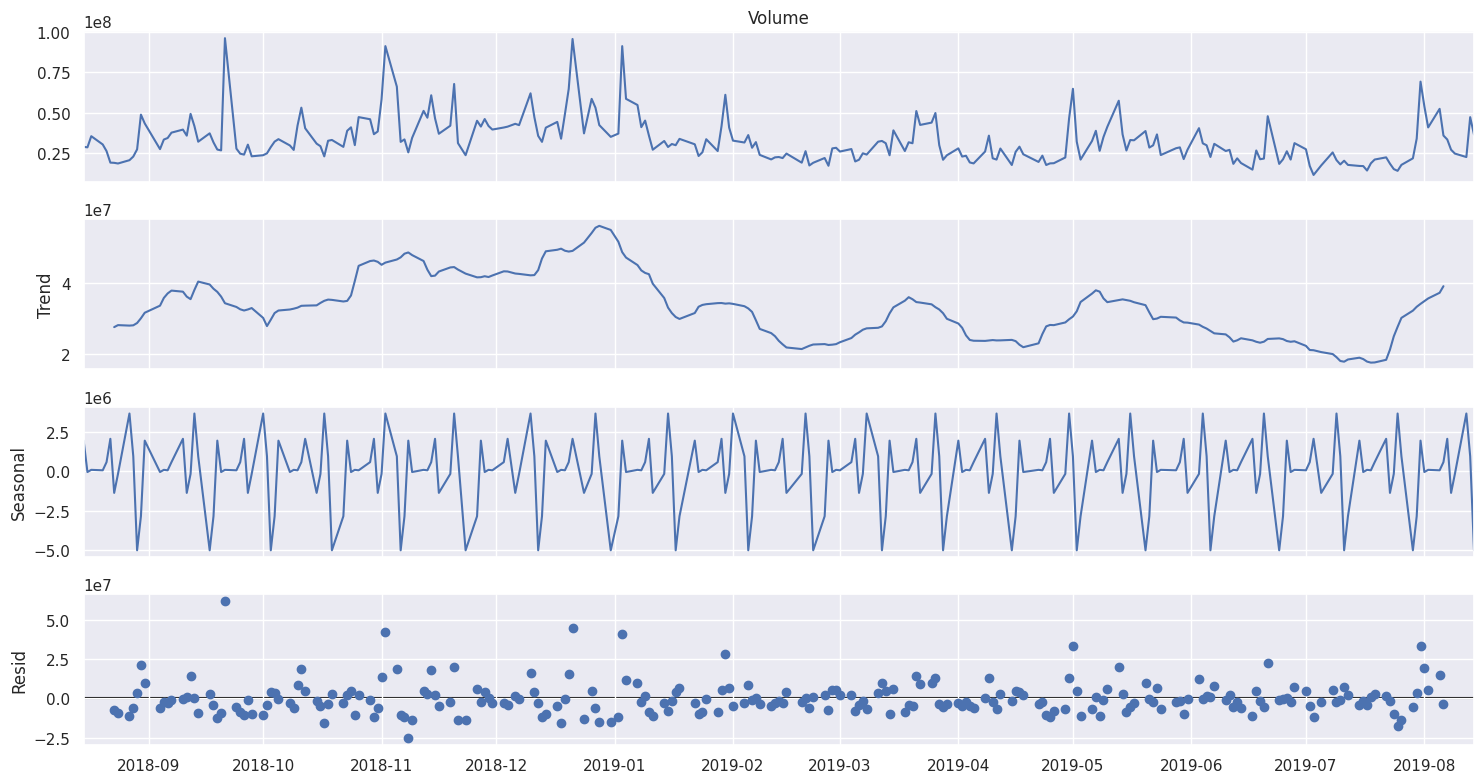

In [ ]:
# Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(df_final['Volume'], period=12)
decompostion.plot();
plt.show()

In [ ]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_final['Volume'])

0.13804147049471416

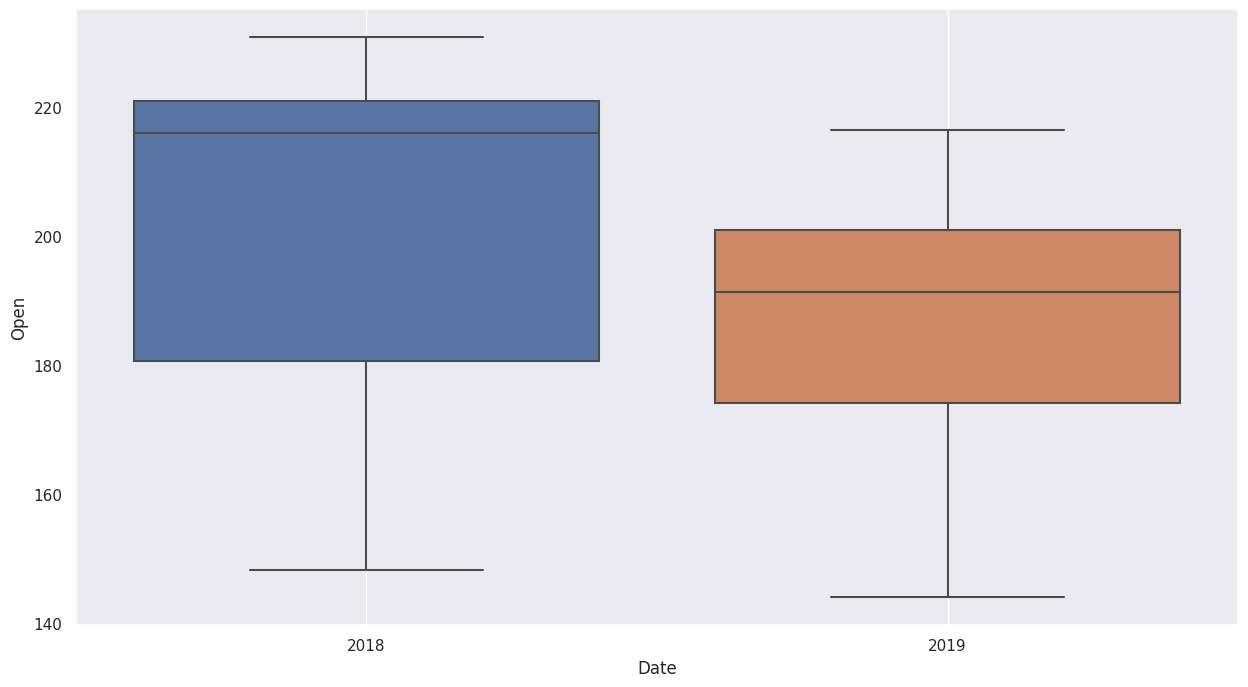

In [ ]:
sns.boxplot(x = df_final.index.year, y= df_final['Open'])
plt.grid()

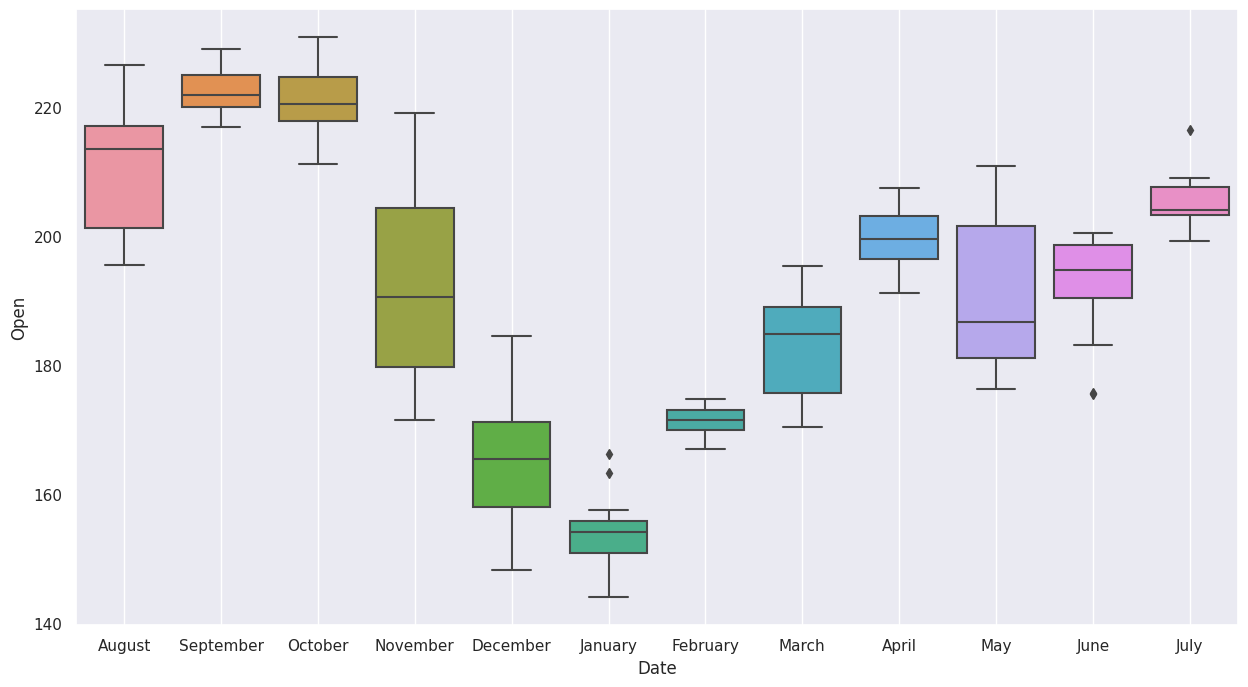

In [ ]:
sns.boxplot(x = df_final.index.month_name(), y=df_final['Open'])
plt.grid()

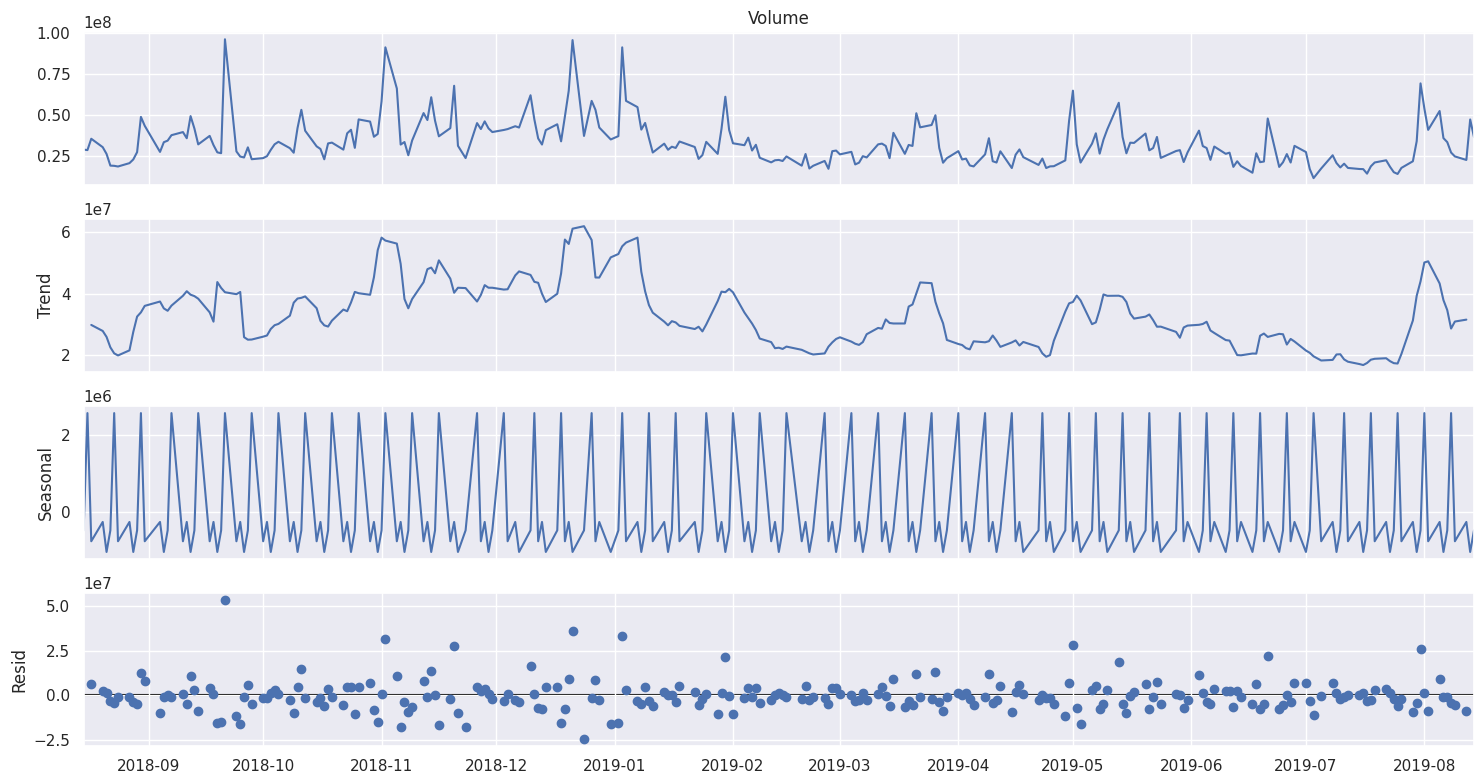

In [ ]:
decompostion = seasonal_decompose(df_final['Volume'], period=5, model = 'additive')
decompostion.plot();
plt.show()

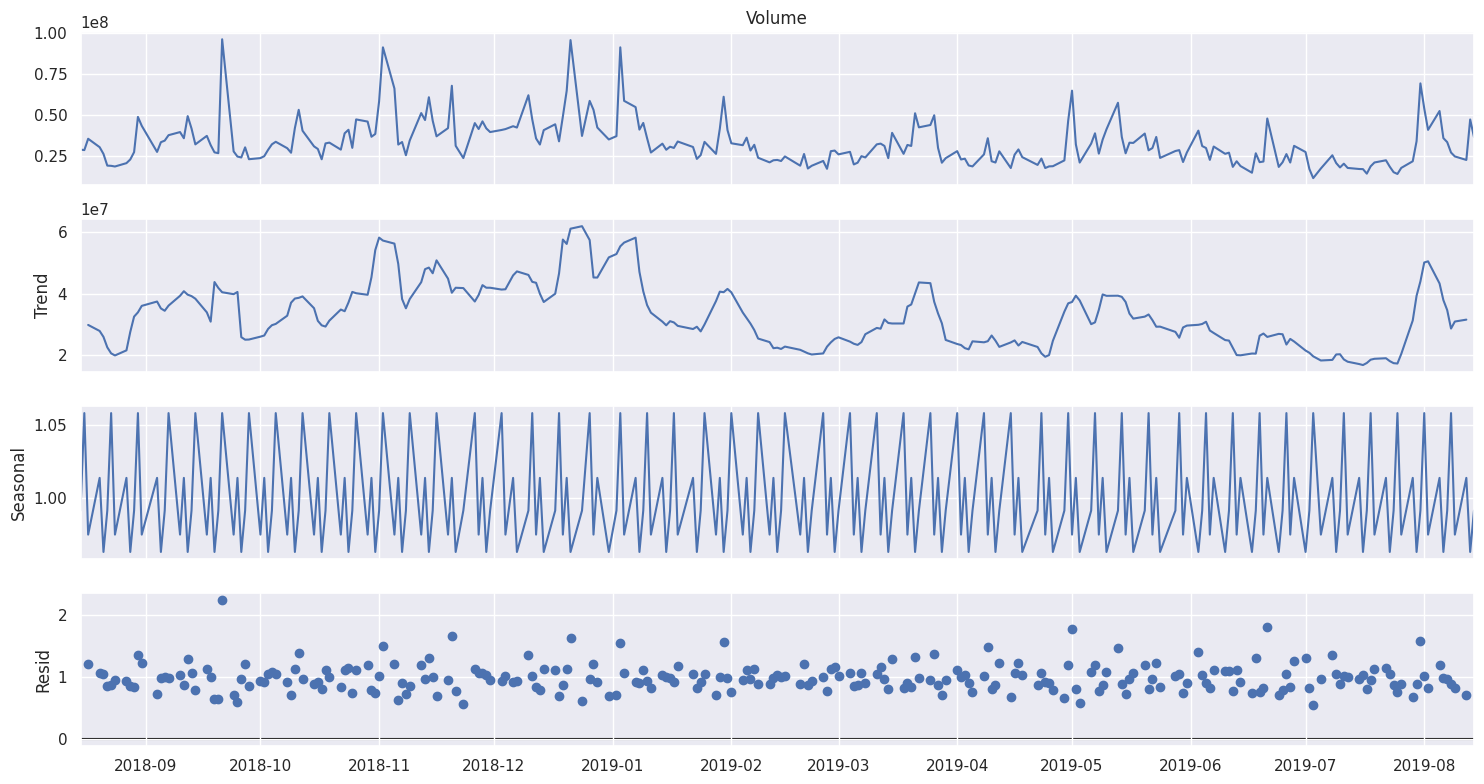

In [ ]:
decompostion = seasonal_decompose(df_final['Volume'], period=5, model = 'multiplicative')
decompostion.plot();
plt.show()

#Seires is additive

In [ ]:
trend = decompostion.trend
seasonality = decompostion.seasonal
residual = decompostion.resid

In [ ]:
print('Trend', '\n', trend.head(12),'\n')
print('seasonality', '\n', seasonality.head(12),'\n')
print('residual', '\n', residual.head(12),'\n')

Trend 
 Date
2018-08-15           NaN
2018-08-16           NaN
2018-08-17    29836500.0
2018-08-20    27878600.0
2018-08-21    25955160.0
2018-08-22    22565040.0
2018-08-23    20612520.0
2018-08-24    19935920.0
2018-08-27    21583260.0
2018-08-28    27565380.0
2018-08-29    32538120.0
2018-08-30    33911120.0
Name: trend, dtype: float64 

seasonality 
 Date
2018-08-15    0.991134
2018-08-16    1.057854
2018-08-17    0.974697
2018-08-20    1.013504
2018-08-21    0.962811
2018-08-22    0.991134
2018-08-23    1.057854
2018-08-24    0.974697
2018-08-27    1.013504
2018-08-28    0.962811
2018-08-29    0.991134
2018-08-30    1.057854
Name: seasonal, dtype: float64 

residual 
 Date
2018-08-15         NaN
2018-08-16         NaN
2018-08-17    1.218195
2018-08-20    1.071939
2018-08-21    1.046814
2018-08-22    0.850352
2018-08-23    0.866002
2018-08-24    0.950848
2018-08-27    0.938302
2018-08-28    0.858198
2018-08-29    0.845120
2018-08-30    1.360181
Name: resid, dtype: float64 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df["Time_Stamp"] = pd.to_datetime(df['Date'])
df_final_model = df.set_index('Time_Stamp')

In [ ]:
df_final_model.head()

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2018-08-15  8/15/2018  209.220001  210.740005  208.330002  210.240005   
2018-08-16  8/16/2018  211.750000  213.809998  211.470001  213.320007   
2018-08-17  8/17/2018  213.440002  217.949997  213.160004  217.580002   
2018-08-20  8/20/2018  218.100006  219.179993  215.110001  215.460007   
2018-08-21  8/21/2018  216.800003  217.190002  214.029999  215.039993   

             Adj Close    Volume  
Time_Stamp                        
2018-08-15  207.027420  28807600  
2018-08-16  210.060333  28500400  
2018-08-17  214.255234  35427000  
2018-08-20  212.167633  30287700  
2018-08-21  211.754028  26159800

In [ ]:
df_final_model["Month"] =df_final_model.index.month
df_final_model["Year"] =df_final_model.index.year

Train-Test split

In [ ]:
#Split data into train-and-test
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime("2019-06-14")]
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime("2019-06-14")]

In [ ]:
train.tail()
test.head()

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2019-06-14  6/14/2019  191.550003  193.589996  190.300003  192.740005   
2019-06-17  6/17/2019  192.899994  194.960007  192.169998  193.889999   
2019-06-18  6/18/2019  196.050003  200.289993  195.210007  198.449997   
2019-06-19  6/19/2019  199.679993  199.880005  197.309998  197.869995   
2019-06-20  6/20/2019  200.369995  200.610001  198.029999  199.460007   

             Adj Close    Volume  Month  Year  
Time_Stamp                                     
2019-06-14  192.010468  18761500      6  2019  
2019-06-17  193.156113  14669100      6  2019  
2019-06-18  197.698853  26551000      6  2019  
2019-06-19  197.121048  21124200      6  2019  
2019-06-20  198.705032  21514000      6  2019

In [ ]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [ ]:
train_final.head()

Volume
Time_Stamp          
2018-08-15  28807600
2018-08-16  28500400
2018-08-17  35427000
2018-08-20  30287700
2018-08-21  26159800

In [ ]:
# Test for stationarity of the series - Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    # plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean & Standard Deviation")
    plt.show(block=False)

    # Perform Dickey Fuller Test:
    print("Results of Dickey - Fuller Test :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used',
                                            'No of Observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput, '\n')

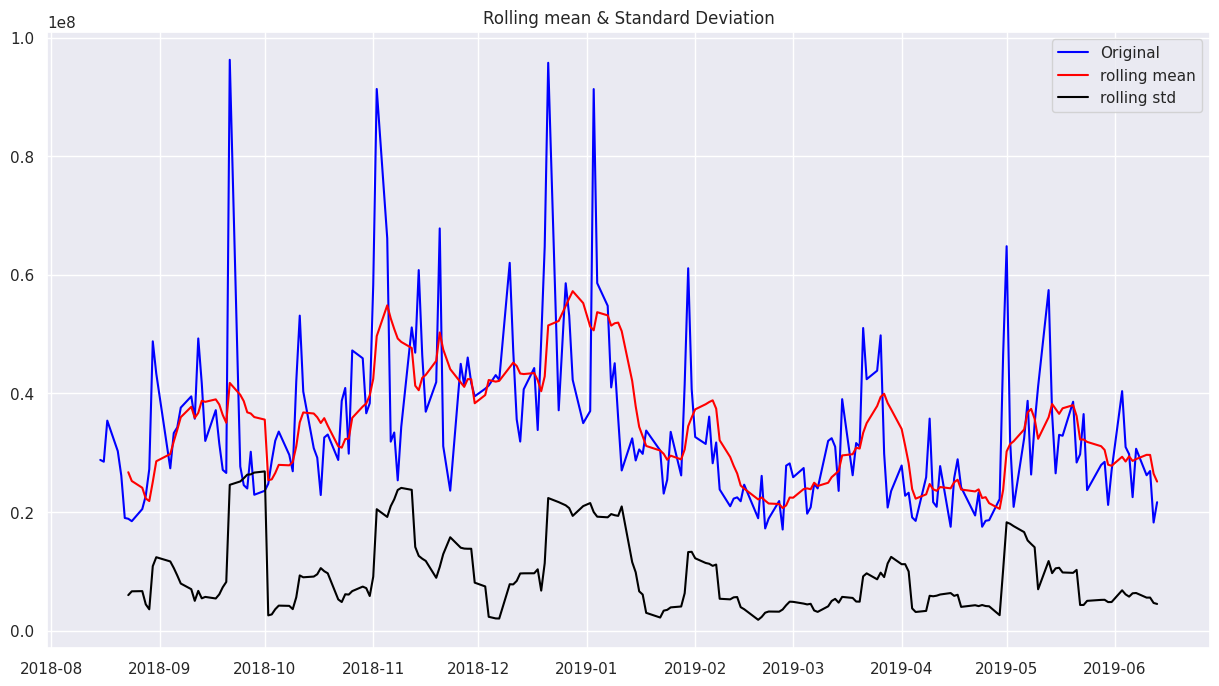

Results of Dickey - Fuller Test :
Test Statistic             -2.864792
p-value                     0.049598
#Lags used                  6.000000
No of Observation used    201.000000
Critical value (1%)        -3.463309
Critical value (5%)        -2.876029
Critical value (10%)       -2.574493
dtype: float64 



In [ ]:
test_stationarity(train_final["Volume"])

Series is Stationary at 5% aplha as per Dickey Fuller Test


Build an ARIMA model

In [ ]:
import itertools
p = q = range(0, 3)
d = range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print("Examples of parameter combinations for Model....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[2], model_pdq[3]))
print('Model : {}{}'.format(pdq[2], model_pdq[4]))
print('Model : {}{}'.format(pdq[1], model_pdq[5]))

Examples of parameter combinations for Model....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
Model : (0, 0, 2)(1, 0, 0, 5)
Model : (0, 0, 2)(1, 0, 1, 5)
Model : (0, 0, 1)(1, 0, 2, 5)


In [ ]:
##Build a ARIMA model
# creating an empty DataFrame with column names only

dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    mod = ARIMA(train_final['Volume'], order=param)
    results_Arima = mod.fit()
    print("ARIMA{} - AIC:{}".format(param, results_Arima.aic))
    dfObj = dfObj.append({'param':param, 'AIC':results_Arima.aic}, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

ARIMA(0, 0, 0) - AIC:8332.739978519614
ARIMA(0, 0, 1) - AIC:7384.608245529029


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

ARIMA(0, 0, 2) - AIC:7379.130340788781
ARIMA(1, 0, 0) - AIC:7372.0748963861715


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1) - AIC:7373.1945299939325


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 2) - AIC:7366.068758420941
ARIMA(2, 0, 0) - AIC:7373.701699527653


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

ARIMA(2, 0, 1) - AIC:7367.221284403231


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 2) - AIC:7367.968658636557


In [ ]:
dfObj.sort_values(by=['AIC'])

param          AIC
5  (1, 0, 2)  7366.068758
7  (2, 0, 1)  7367.221284
8  (2, 0, 2)  7367.968659
3  (1, 0, 0)  7372.074896
4  (1, 0, 1)  7373.194530
6  (2, 0, 0)  7373.701700
2  (0, 0, 2)  7379.130341
1  (0, 0, 1)  7384.608246
0  (0, 0, 0)  8332.739979

In [ ]:
# ARIMA(1,0,2) has the lowest AIC

mod = ARIMA(train_final['Volume'], order=(1,0,2))
results_Arima= mod.fit()
print(results_Arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  208
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -3678.034
Date:                Sun, 29 Oct 2023   AIC                           7366.069
Time:                        19:03:07   BIC                           7382.756
Sample:                             0   HQIC                          7372.816
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.434e+07   3.04e-10   1.13e+17      0.000    3.43e+07    3.43e+07
ar.L1          0.9466      0.044     21.495      0.000       0.860       1.033
ma.L1         -0.5248      0.067     -7.841      0.0

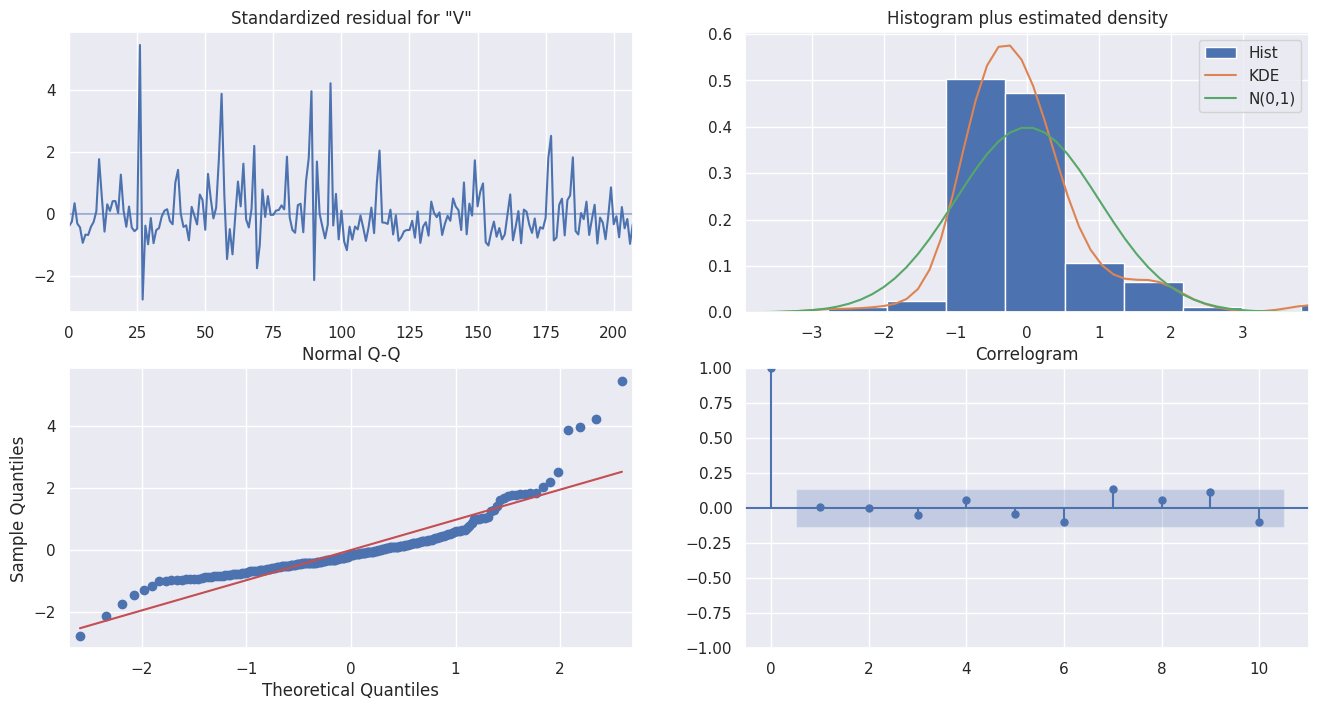

In [ ]:
results_Arima.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
final_hat_avg = test_final.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.732295e+07
209    2.869386e+07
210    2.899492e+07
211    2.927991e+07
212    2.954969e+07
213    2.980508e+07
214    3.004684e+07
215    3.027570e+07
216    3.049235e+07
217    3.069743e+07
218    3.089158e+07
219    3.107536e+07
220    3.124934e+07
221    3.141403e+07
222    3.156994e+07
223    3.171752e+07
224    3.185723e+07
225    3.198949e+07
226    3.211469e+07
227    3.223320e+07
228    3.234540e+07
229    3.245160e+07
230    3.255214e+07
231    3.264732e+07
232    3.273741e+07
233    3.282270e+07
234    3.290344e+07
235    3.297987e+07
236    3.305222e+07
237    3.312071e+07
238    3.318554e+07
239    3.324692e+07
240    3.330502e+07
241    3.336002e+07
242    3.341208e+07
243    3.346137e+07
244    3.350803e+07
245    3.355220e+07
246    3.359401e+07
247    3.363359e+07
248    3.367105e+07
249    3.370652e+07
250    3.374010e+07
Name: predicted_mean, dtype: float64

In [44]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_ARIMA, squared=False))
print(rmse)

3663.273033265166


In [46]:
resultDf = pd.DataFrame({'Test RMSE' : rmse}, index = ['ARIMA(1,0,2)'])
resultDf

Test RMSE
ARIMA(1,0,2)  3663.273033

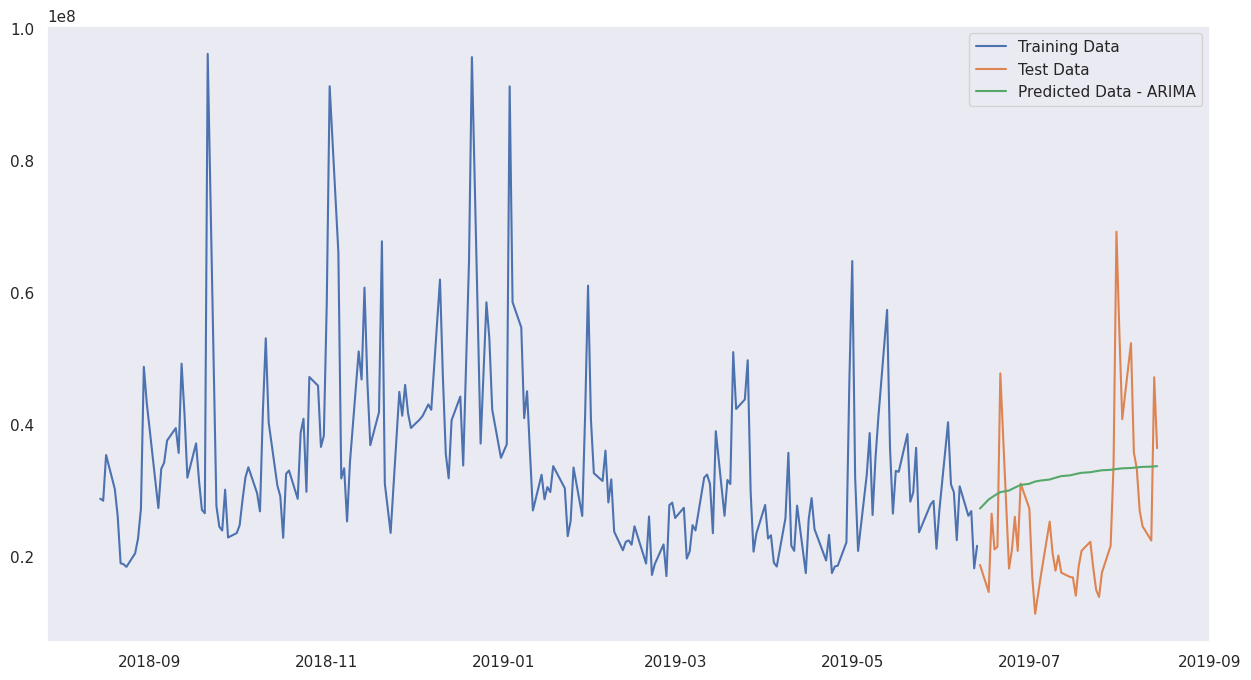

In [47]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

Build SARIMA model

In [48]:
dfObj2 = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [49]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=param,
                                       seasonal_order=param_seasonal,
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param': param, 'seasonal':param_seasonal,
                               'AIC':results_SARIMA.aic}, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7516.843047531705
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:7311.014474314488
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:7335.756112170122
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:7240.848774197255
SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:7067.255496879535
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:7120.87452132768


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:7101.754037207327


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:7069.848627478237
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:7643.903618065293
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:7432.84822447343
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:7241.9785539530985


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:7482.677398931117
SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:7401.246131356325


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:7218.723683044124
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:7295.362488980221
SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:7293.113004755351


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:7220.030979839017
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:7579.19554700965
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:7385.37709882945


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:7200.696127783094
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:7486.688579677626
SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:7368.855765239876


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:7186.08330821864
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:7299.850035871188


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:7297.331773703534


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:7187.372886731848
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:7215.043134007794
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:7041.005271647402


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:7215.058330973909
SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:7195.4420275790035


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.16952287268
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:7040.797133692327


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:7022.17715422171


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:7023.007446136821
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:7312.772230019045


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:7137.525815354398


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:6961.286618388525
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:7173.041387860919


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:7146.181150426538


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:6969.473297817847


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:7000.578933632825


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:6998.987729928055


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:6968.955372262471
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:7263.706658569084


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:7091.7464630911745
SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:6914.849813737677


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:7161.423923716513


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:7104.688066618466


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:6929.774699549751


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:6989.311176192572


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:6987.858384826155


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:6924.302971619798
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:7202.27762275512


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:7028.93367110103
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:7167.835351502853


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:7161.057783640954
SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.512854875884


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:6990.399041050346


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:6982.5740140939315


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:6983.068932807824
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:7768.629821619439


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimizat

SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:7439.5599044198625
SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:7218.851247584396


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:7127.425960950648


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:7129.4192280467905


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:6965.284736178446


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:7032.859556555331
SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:6964.018595560518


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and 

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:6960.3250818197475
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:7265.5031261588265
SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:7092.752413705445


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:6916.638345455667


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:7127.911349480699


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:7105.977989745279


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:6931.614277902267


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:6952.429104212759


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and 

SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:6953.660942204705
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:6926.058672370164


In [50]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
47  (1, 0, 2)  (0, 0, 2, 5)  6914.849814
74  (2, 0, 2)  (0, 0, 2, 5)  6916.638345
53  (1, 0, 2)  (2, 0, 2, 5)  6924.302972
80  (2, 0, 2)  (2, 0, 2, 5)  6926.058672
50  (1, 0, 2)  (1, 0, 2, 5)  6929.774700
..        ...           ...          ...
1   (0, 0, 0)  (0, 0, 1, 5)  7516.843048
18  (0, 0, 2)  (0, 0, 0, 5)  7579.195547
9   (0, 0, 1)  (0, 0, 0, 5)  7643.903618
63  (2, 0, 1)  (0, 0, 0, 5)  7768.629822
0   (0, 0, 0)  (0, 0, 0, 5)  7803.902158

[81 rows x 3 columns]

In [51]:
# (1, 0, 2)	(0, 0, 2, 5) 6914.849724
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=(1,0,2),
                                       seasonal_order=(0,0,2,5),
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3451.425
Date:                           Sun, 29 Oct 2023   AIC                           6914.850
Time:                                   19:52:33   BIC                           6934.488
Sample:                                        0   HQIC                          6922.801
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.004    225.756      0.000       0.990       1.007
ma.L1         -0.5661      0.056    -10.019

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



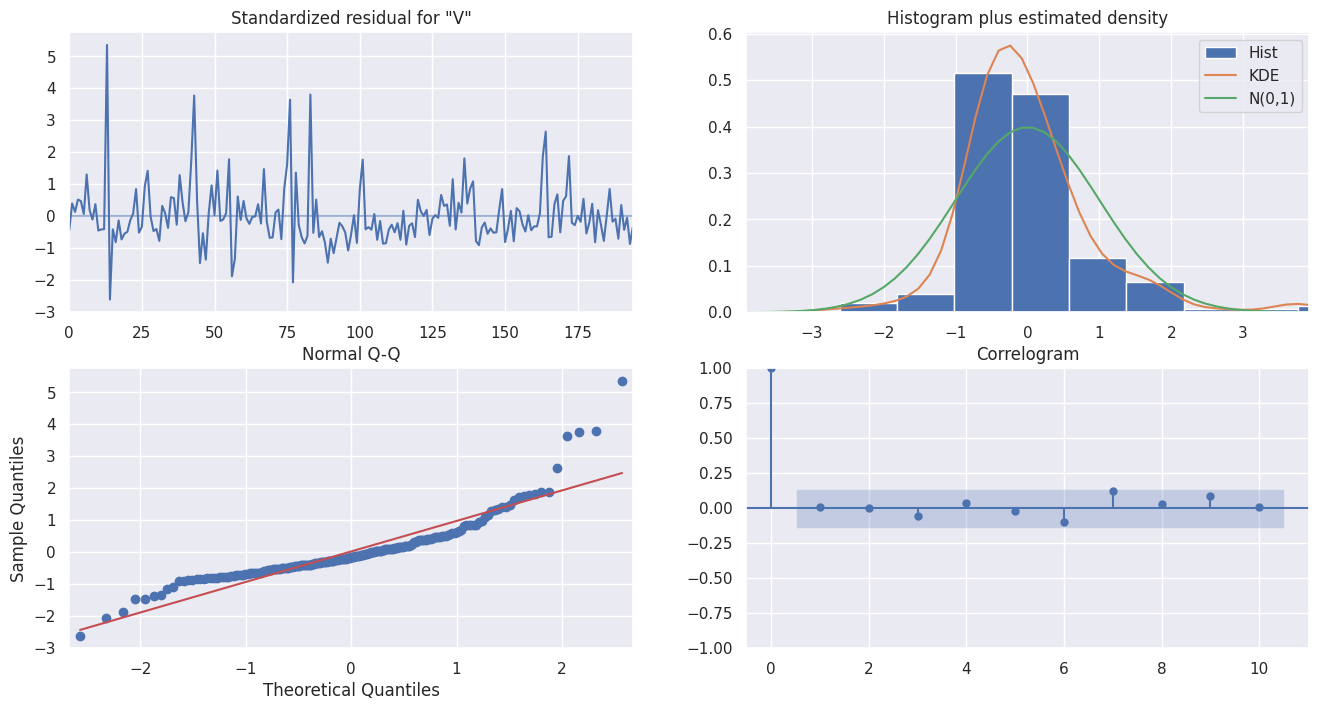

In [52]:
results_SARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [53]:
final_hat_avg = test_final.copy()
pred_SARIMA = results_SARIMA.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.551479e+07
209    2.511323e+07
210    2.604888e+07
211    2.665563e+07
212    2.748718e+07
213    2.606204e+07
214    2.666964e+07
215    2.646216e+07
216    2.755367e+07
217    2.724051e+07
218    2.655870e+07
219    2.638344e+07
220    2.634074e+07
221    2.629811e+07
222    2.625555e+07
223    2.621306e+07
224    2.617063e+07
225    2.612828e+07
226    2.608599e+07
227    2.604377e+07
228    2.600162e+07
229    2.595953e+07
230    2.591752e+07
231    2.587557e+07
232    2.583369e+07
233    2.579188e+07
234    2.575014e+07
235    2.570847e+07
236    2.566686e+07
237    2.562532e+07
238    2.558384e+07
239    2.554244e+07
240    2.550110e+07
241    2.545982e+07
242    2.541862e+07
243    2.537748e+07
244    2.533641e+07
245    2.529540e+07
246    2.525446e+07
247    2.521359e+07
248    2.517278e+07
249    2.513204e+07
250    2.509136e+07
Name: predicted_mean, dtype: float64

In [54]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMA.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMA.predicted_mean)
print(rmse)
print(mape*100)

3547.63614706124
38.12122882037947


In [55]:
resultDf1 = pd.DataFrame({'Test RMSE' : rmse}, index = ['SARIMA(1, 0, 2)	(0, 0, 2, 5) 6914.849724'])
resultDf1 = pd.concat([resultDf, resultDf1])
resultDf1

Test RMSE
ARIMA(1,0,2)                               3663.273033
SARIMA(1, 0, 2)\t(0, 0, 2, 5) 6914.849724  3547.636147

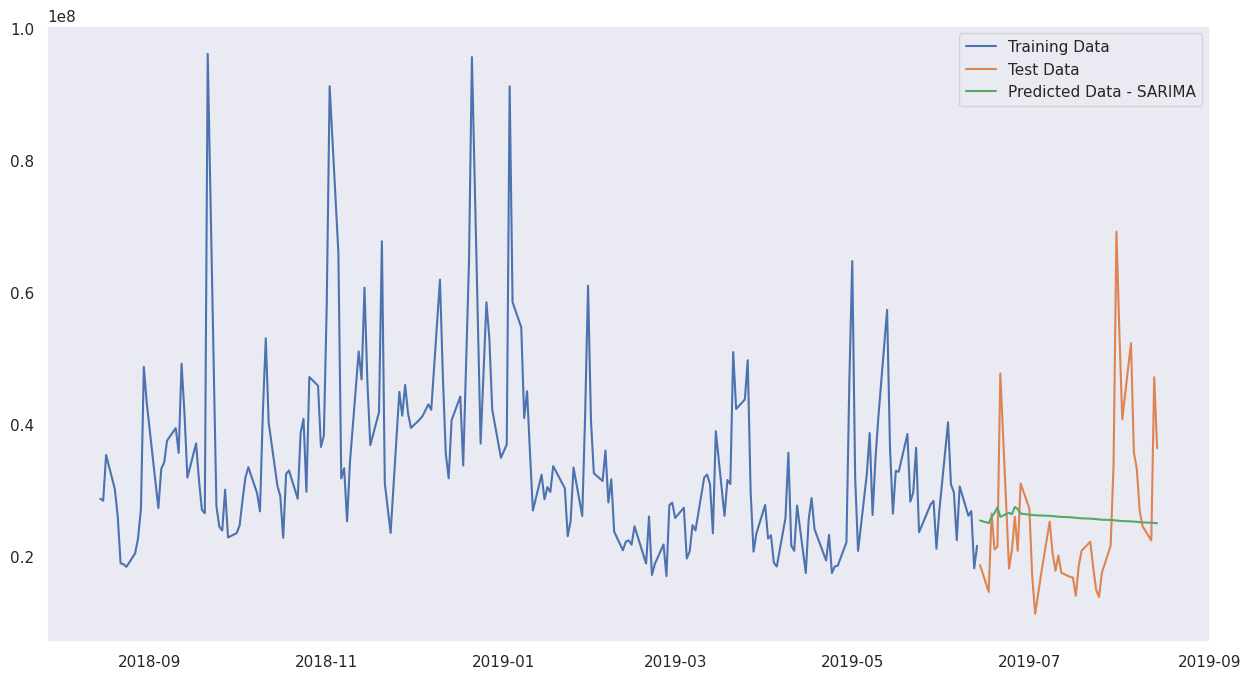

In [56]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

Build a SARIMAX model

In [57]:
ex_train = train[['Open', 'Close','High', 'Low']]
ex_test = test[['Open', 'Close','High', 'Low']]

In [58]:
dfObj3 = pd.DataFrame(columns=['param', 'seasonal_ex', 'AIC'])
dfObj3

Empty DataFrame
Columns: [param, seasonal_ex, AIC]
Index: []

In [59]:
# Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=param,
                                       seasonal_order=param_seasonal,
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj3 = dfObj3.append({'param': param, 'seasonal':param_seasonal,
                               'AIC':results_SARIMA.aic}, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7147.885736558033
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:6974.64256909251
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:7181.2245788386035


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:7140.308388267435


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:6969.112725572325
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:7006.388489457346


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:7003.388037084042
SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:6972.419939979212


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:7094.312353589037
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:6923.088475180796


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:7163.321339060871
SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:7091.564698787384


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:6920.815042058217
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:6991.5669424393


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:6990.25135259593


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:6922.0369538888535
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:7229.533063100771
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:7058.034261626042


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:6885.855821475328
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:7161.478036628566


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:7056.221243683448


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:6883.8459413535875
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:6990.206027919887


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:6988.973541920874


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:6886.335750516784
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:7122.814857252343


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:6952.622763737861
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:7122.707211593837


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:7121.32735849125


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:6950.881550166649
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:6952.335585706027


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:6950.957905940477


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:6952.4760500105895
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:7250.235476701393


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:7078.032192394343


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:6908.200463299111
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:7112.686877078223


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:7079.984742480639


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:6908.636219204713


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:6942.604169524064


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:6943.590212620727


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:6900.761360387117
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:7215.045132108903


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:7043.839798593936


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:6872.112333605808


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:7112.666810370276


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:7045.789650498755


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:6873.225431634039


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:6942.609009942246


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:6944.076850535836


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and 

SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:6872.699307053852
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:7121.512500658899
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:6951.777993622891
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:7087.081099491129


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:7086.573209973766


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:6950.168057466834
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:6917.175245697617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:6915.896924226981


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:6910.686106235002
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:7249.4458925513745


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:7078.070830203521


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:6908.116884408913


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:7078.106548396055


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:7080.041071210547


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:6909.154137836649


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:6908.017432619211


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:6909.030839517284


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and 

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:6908.941359288199
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:7217.040923134922


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:7045.830287221146


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:6874.110704463361


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:7080.103357464134


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:7047.783126963508


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:6875.21945513022


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:6909.974802979592


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and 

SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:6910.9960674910435
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:6874.834276419369


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [60]:
dfObj3.sort_values(by=['AIC'])

param seasonal_ex          AIC      seasonal
47  (1, 0, 2)         NaN  6872.112334  (0, 0, 2, 5)
53  (1, 0, 2)         NaN  6872.699307  (2, 0, 2, 5)
50  (1, 0, 2)         NaN  6873.225432  (1, 0, 2, 5)
74  (2, 0, 2)         NaN  6874.110704  (0, 0, 2, 5)
80  (2, 0, 2)         NaN  6874.834276  (2, 0, 2, 5)
..        ...         ...          ...           ...
36  (1, 0, 1)         NaN  7250.235477  (0, 0, 0, 5)
54  (2, 0, 0)         NaN  7257.081652  (0, 0, 0, 5)
9   (0, 0, 1)         NaN  7267.821421  (0, 0, 0, 5)
27  (1, 0, 0)         NaN  7293.565623  (0, 0, 0, 5)
0   (0, 0, 0)         NaN  8222.000319  (0, 0, 0, 5)

[81 rows x 4 columns]

In [61]:
# (1, 0, 2)	NaN	6872.112334	(0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=(1,0,2),
                                       seasonal_order=(0,0,2,5),
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3426.056
Date:                           Sun, 29 Oct 2023   AIC                           6872.112
Time:                                   19:57:57   BIC                           6904.842
Sample:                                        0   HQIC                          6885.364
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open       -6.795e+04   2.07e+05     -0.328      0.743   -4.74e+05    3.39e+05
Close      -8.821e+05   2.05e+05     -4.313

In [62]:
final_hat_avg = test_final.copy()
pred_SARIMAX = results_SARIMA.get_forecast(steps=len(test_final), exog= ex_test )
pred_SARIMAX.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.481983e+07
209    2.367067e+07
210    3.430943e+07
211    2.392995e+07
212    2.353840e+07
213    2.507269e+07
214    2.147017e+07
215    3.165642e+07
216    2.872494e+07
217    2.221612e+07
218    2.374670e+07
219    3.144624e+07
220    2.026147e+07
221    1.999662e+07
222    2.275699e+07
223    2.647965e+07
224    2.445084e+07
225    2.256562e+07
226    2.673240e+07
227    2.128480e+07
228    2.177248e+07
229    2.588448e+07
230    2.253510e+07
231    2.293046e+07
232    3.470416e+07
233    2.931534e+07
234    2.066428e+07
235    2.272650e+07
236    2.653926e+07
237    2.689648e+07
238    2.440559e+07
239    2.755123e+07
240    6.605667e+07
241    7.221157e+07
242    3.673608e+07
243    4.426433e+07
244    3.175453e+07
245    3.898454e+07
246    3.194321e+07
247    3.036411e+07
248    2.776479e+07
249    6.848053e+07
250    3.418377e+07
Name: predicted_mean, dtype: float64

In [63]:
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMAX.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMAX.predicted_mean)
print(rmse)
print(mape*100)

2872.4565274383717
29.226985433280383


In [64]:
resultDf2 = pd.DataFrame({'Test RMSE' : rmse}, index = ['(1, 0, 2)	NaN	6872.112334	(0, 0, 2, 5)'])
resultDf = pd.concat([resultDf, resultDf1, resultDf2])
resultDf2

Test RMSE
(1, 0, 2)\tNaN\t6872.112334\t(0, 0, 2, 5)  2872.456527

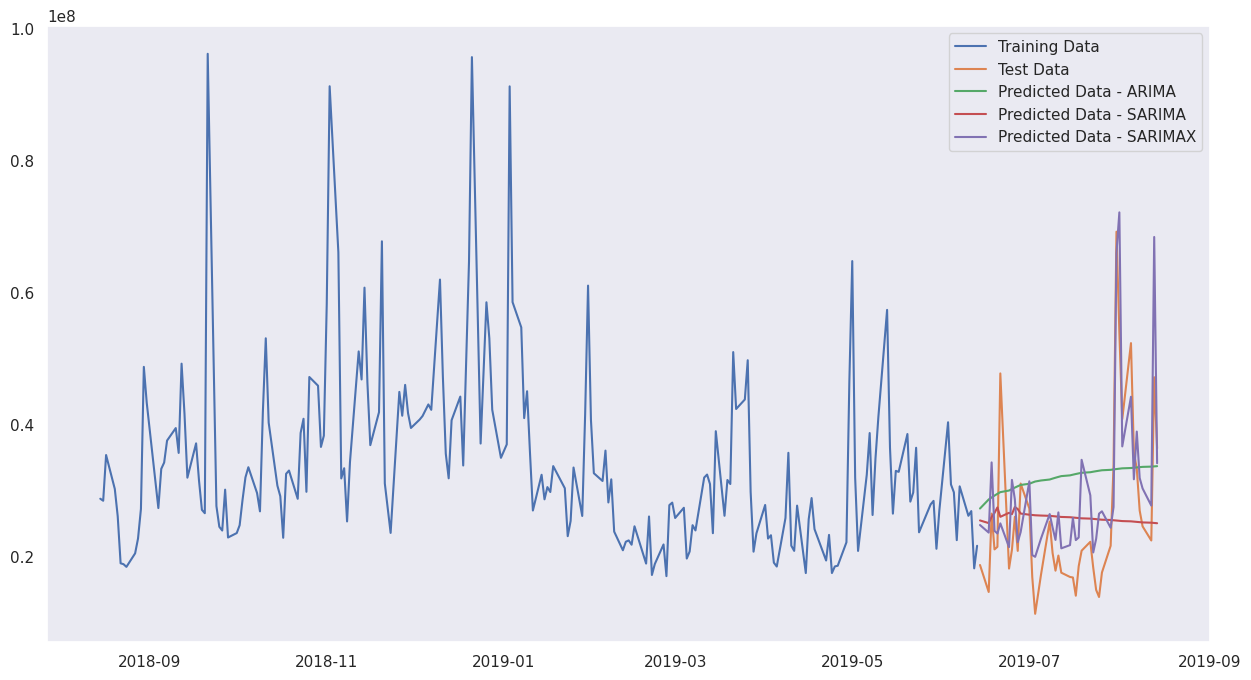

In [65]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();